<a href="https://colab.research.google.com/github/vinodkumarreddy/Pytorch-learning/blob/main/Pytorch_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch Tensors

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
device = "gpu" if torch.cuda.is_available() else "cpu"

In [ ]:
# Creating tensors and default dtypes
zeros_t = torch.zeros(size = (3,4), device = device)
ones_t = torch.ones((2,3))
empty_t = torch.empty(4,3, device = device)
rand_t = torch.rand((100,100), device = device)

In [ ]:
zeros_t.shape

torch.Size([3, 4])

In [ ]:
zeros_t

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
zeros_t.dtype

torch.float32

In [ ]:
ones_t

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
ones_t.dtype

torch.float32

In [ ]:
torch.min(rand_t), torch.max(rand_t)

(tensor(1.2100e-05), tensor(0.9994))

When a random seed is set, then the random number generator generator starts to generate the same sequence of random numbers as long as the we are looking from the point from where the seed was set.

In [ ]:
torch.manual_seed(1729)
rand_tensor_1 = torch.rand(3,4)
rand_tensor_2 = torch.rand(4,3)

torch.manual_seed(1729)
rand_tensor_3 = torch.rand(4,3)
rand_tensor_4 = torch.rand(3,4)

In [ ]:
rand_tensor_1, rand_tensor_2

(tensor([[0.3126, 0.3791, 0.3087, 0.0736],
         [0.4216, 0.0691, 0.2332, 0.4047],
         [0.2162, 0.9927, 0.4128, 0.5938]]),
 tensor([[0.6128, 0.1519, 0.0453],
         [0.5035, 0.9978, 0.3884],
         [0.6929, 0.1703, 0.1384],
         [0.4759, 0.7481, 0.0361]]))

In [ ]:
rand_tensor_3, rand_tensor_4

(tensor([[0.3126, 0.3791, 0.3087],
         [0.0736, 0.4216, 0.0691],
         [0.2332, 0.4047, 0.2162],
         [0.9927, 0.4128, 0.5938]]),
 tensor([[0.6128, 0.1519, 0.0453, 0.5035],
         [0.9978, 0.3884, 0.6929, 0.1703],
         [0.1384, 0.4759, 0.7481, 0.0361]]))

In [ ]:
rand_tensor_1.flatten(), rand_tensor_3.flatten()

(tensor([0.3126, 0.3791, 0.3087, 0.0736, 0.4216, 0.0691, 0.2332, 0.4047, 0.2162,
         0.9927, 0.4128, 0.5938]),
 tensor([0.3126, 0.3791, 0.3087, 0.0736, 0.4216, 0.0691, 0.2332, 0.4047, 0.2162,
         0.9927, 0.4128, 0.5938]))

Most Tensor Operations are intuitive. Broadcasting helps pytorch choose the most semantically appropriate operation even when the shapes of the tensors are not matching.

In [ ]:
ones_t = torch.ones(3,4)
twos_t = ones_t * 2
fours_t = twos_t**2
halfs_t = fours_t/8
ones_t, twos_t, fours_t, halfs_t

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]]),
 tensor([[4., 4., 4., 4.],
         [4., 4., 4., 4.],
         [4., 4., 4., 4.]]),
 tensor([[0.5000, 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 0.5000]]))

In [ ]:
ones = torch.ones(3,4)
twos = ones*2
threes = ones + twos

In [ ]:
ones, twos, threes

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]]),
 tensor([[3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.]]))

In [ ]:
twos_1d_tensor = ones[0]

In [ ]:
ones.shape, twos_1d_tensor.shape

(torch.Size([3, 4]), torch.Size([4]))

In [ ]:
ones + twos_1d_tensor

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

In [ ]:
var1 = ones[0].reshape(1, -1)
var2 = ones[0].reshape(4, -1)

In [ ]:
ones.shape, var1.shape, ones + var1

(torch.Size([3, 4]),
 torch.Size([1, 4]),
 tensor([[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]]))

In [ ]:
ones.shape, var2.shape

(torch.Size([3, 4]), torch.Size([4, 1]))

In [ ]:
ones + var2

RuntimeError: ignored

So, a tensor of shape 4 can be broadcasted and added to the tensor of shape (3,4). Similarly a tensor of shape (1,4) can be added to a tensor of shape (3,4) by broadcasting. Now, a tensor of shape (4,1) although consisting of the same number of elements will not be broadcasted. It also points towards the rule of broadcasting where we start from the end. The shapes need to be consistent according to the operation we are doing(addition requires same dimension size, while multiplication requires mxp, pxn rule) or the dimension is one in which case it will be copied and broadcasted to proceed with the operation, or the dimension simply doesn't exist in which case its the same as having one.

In [ ]:
batch_size = 100
channels = 5
rand1 = torch.rand(batch_size, channels, 4,5)
rand2 = torch.rand(5,2)
rand3 = torch.matmul(rand1, rand2)
rand4 = rand1 @ rand2

In [ ]:
rand1.shape, rand2.shape, rand3.shape, rand4.shape

(torch.Size([100, 5, 4, 5]),
 torch.Size([5, 2]),
 torch.Size([100, 5, 4, 2]),
 torch.Size([100, 5, 4, 2]))

There are many default pytorch mathematical functions which we can explore. These functions also have the added benefit that auto diff is supported where possible.

Building Models

Here is an example of the LENET Model.

In [ ]:
nn.Conv2d??

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
    self.cnn2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    h = F.relu(self.cnn1(x))
    h = F.max_pool2d(h, (2,2))

    h = F.relu(self.cnn2(h))
    h = F.max_pool2d(h, 2)

    h = h.reshape(h.shape[0], -1)
    h = self.fc1(h)
    h = F.relu(h)

    h = self.fc2(h)
    h = F.relu(h)

    h = self.fc3(h)
    return h




Generally any parametric based layers like convolution layer or the linear layer are available as a layer object. Purely functional operations like relu, max_pool2d are available as layers as well as functional arguments. The same network can also be defined in a different way using only layer objects.

In [ ]:
lenet = LeNet()

In [ ]:
test_input = torch.rand(size = (128, 1, 32, 32))
out = lenet(test_input)

In [ ]:
out.shape

torch.Size([128, 10])

In [ ]:
out

tensor([[ 0.0593, -0.0600, -0.0168,  ...,  0.0660, -0.0722, -0.0179],
        [ 0.0577, -0.0571, -0.0183,  ...,  0.0688, -0.0727, -0.0216],
        [ 0.0564, -0.0623, -0.0171,  ...,  0.0693, -0.0772, -0.0187],
        ...,
        [ 0.0581, -0.0612, -0.0165,  ...,  0.0679, -0.0728, -0.0176],
        [ 0.0565, -0.0597, -0.0179,  ...,  0.0661, -0.0751, -0.0208],
        [ 0.0558, -0.0601, -0.0192,  ...,  0.0637, -0.0739, -0.0178]],
       grad_fn=<AddmmBackward0>)

In [23]:
class LeNetS(nn.Module):
  def __init__(self):
    super(LeNetS, self).__init__()
    self.cnn1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
    self.cnn2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.pool_layer = nn.MaxPool2d(kernel_size = 2)
    self.relu = nn.ReLU()
    self.flatten = nn.Flatten()
    self.lenet_layer = nn.Sequential(
        self.cnn1,
        self.relu,
        self.pool_layer,
        self.cnn2,
        self.relu,
        self.pool_layer,
        self.flatten,
        self.fc1,
        self.relu,
        self.fc2,
        self.relu,
        self.fc3
    )

  def forward(self, input_image):
    return self.lenet_layer(input_image)


In [ ]:
lenet = LeNetS()
input_images = torch.rand(128, 1, 32, 32)
out = lenet(input_images)

In [ ]:
out.shape

torch.Size([128, 10])

In [ ]:
out

tensor([[-0.0412, -0.0822, -0.0123,  ...,  0.0042, -0.0949,  0.0609],
        [-0.0401, -0.0873, -0.0146,  ...,  0.0009, -0.0951,  0.0584],
        [-0.0393, -0.0884, -0.0120,  ...,  0.0016, -0.0946,  0.0620],
        ...,
        [-0.0364, -0.0899, -0.0121,  ...,  0.0043, -0.0943,  0.0604],
        [-0.0415, -0.0849, -0.0117,  ...,  0.0055, -0.0924,  0.0539],
        [-0.0366, -0.0862, -0.0126,  ...,  0.0036, -0.0937,  0.0598]],
       grad_fn=<AddmmBackward0>)

# Data Sets and Data Loaders

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import torch.nn as nn

In [3]:
import matplotlib.pyplot as plt

In [4]:
lenet_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(
            (0.4914, 0.4822, 0.4465),
            (0.2470, 0.2435, 0.2616)
        )
    ]
)

In [5]:
cifar_data = torchvision.datasets.CIFAR10(
    root = "./data",
    download = True,
    train = True,
    transform = lenet_transforms
)

100%|██████████| 170498071/170498071 [00:03<00:00, 43033009.30it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:
means = torch.tensor([0.4914, 0.4822, 0.4465])
stdevs = torch.tensor([0.2470, 0.2435, 0.2616])

In [7]:
reshaped_means = means.view(size = (3, 1, -1))
reshaped_stdevs = stdevs.view(size = (3, 1, -1))

All the datasets in TorchVision, TorchAudio, TorchText are subclasses of the class torch.utils.data.Dataset. There are also utility classes like torchvision.datasets.ImageFolder or even create our own datasets from scratch.

A Dataset instantiation requires a few things to work.
- A file path to save the data or where the data is present.
- It also requires a flag stating if that particular data set if a test or train dataset.
- A flag to specify if we want to download the dataset
- Transformations we would like to use on our data.

Datasets generally are built keeping the data in mind. A lot of its functionality is tied to the format of the, the location of the data etc. While a data loader is sort of agnostic towards the data. It directly acts up on a dataset and offers some data loading functionality which is helpful for model training and development.

In [8]:
trainloader = torch.utils.data.DataLoader(cifar_data, batch_size = 16, shuffle = True, num_workers = 2)

In [9]:
train_iterator = iter(trainloader)
images_t,classes = next(train_iterator)

In [10]:
img_grid = torchvision.utils.make_grid(
    images_t,
    nrow = 4
)

In [11]:
img_grid.shape

torch.Size([3, 138, 138])

In [12]:
img_grid = img_grid*reshaped_stdevs + reshaped_means
img_grid_t = img_grid.transpose(0,1).transpose(1,2)

In [13]:
img_grid_t.shape

torch.Size([138, 138, 3])

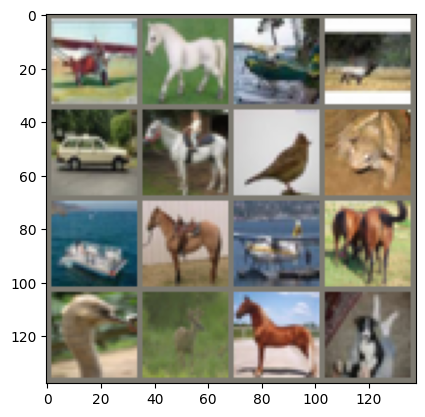

In [14]:
plt.imshow(img_grid_t)

In [15]:
torch.utils.data.DataLoader??

In [16]:
trainloader = (
    torch
    .utils
    .data
    .DataLoader(
        cifar_data,
        batch_size = 32,
        shuffle = True,
        num_workers = 2
    )
)

In [17]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [18]:
class LeNetS(nn.Module):
  def __init__(self):
    super(LeNetS, self).__init__()
    self.cnn1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5)
    self.cnn2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.pool_layer = nn.MaxPool2d(kernel_size = 2)
    self.relu = nn.ReLU()
    self.flatten = nn.Flatten()
    self.lenet_layer = nn.Sequential(
        self.cnn1,
        self.relu,
        self.pool_layer,
        self.cnn2,
        self.relu,
        self.pool_layer,
        self.flatten,
        self.fc1,
        self.relu,
        self.fc2,
        self.relu,
        self.fc3
    )

  def forward(self, input_image):
    return self.lenet_layer(input_image)


In [19]:
lenet = LeNetS()

In [20]:
import torch.optim as optim

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet.parameters(), lr=0.001, momentum=0.9)

In [22]:
criterion??

### Training Loop

In [23]:
epochs = 20
for epoch in range(epochs):
  running_loss = 0
  for batch_no, batch in enumerate(trainloader):
    lenet.train()
    optimizer.zero_grad()
    X, y = batch
    out = lenet(X)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print(f"Epoch - {epoch}, loss - {running_loss/batch_no}")




Epoch - 0, loss - 2.0643278656482087
Epoch - 1, loss - 1.6297876008341468
Epoch - 2, loss - 1.4598840140044766
Epoch - 3, loss - 1.3513382075690734
Epoch - 4, loss - 1.2600414006184981
Epoch - 5, loss - 1.1843767556887734
Epoch - 6, loss - 1.1260884905212514
Epoch - 7, loss - 1.0781187302171802
Epoch - 8, loss - 1.0360418989319502
Epoch - 9, loss - 0.9974151853562623
Epoch - 10, loss - 0.9607678702561406
Epoch - 11, loss - 0.9309059570754536
Epoch - 12, loss - 0.899914349754855
Epoch - 13, loss - 0.8708633648639452
Epoch - 14, loss - 0.8442352552839797
Epoch - 15, loss - 0.8201503958386129
Epoch - 16, loss - 0.7943870475594427
Epoch - 17, loss - 0.7745461132706509
Epoch - 18, loss - 0.7513227072590902
Epoch - 19, loss - 0.7279033928193753


In [24]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=lenet_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [25]:
tlit = iter(testloader)
batch = next(tlit)

In [26]:
X_test, y_test = batch

In [27]:
X_test.shape

torch.Size([4, 3, 32, 32])

In [28]:
torch.max??

In [29]:
with torch.no_grad():
  out = lenet(X_test)
  out_label = torch.max(out, dim = 1)

In [30]:
out_label

torch.return_types.max(
values=tensor([6.1245, 8.9721, 4.8864, 6.0610]),
indices=tensor([3, 8, 8, 0]))

In [32]:
running_loss = 0
correct = 0
total = 0
with torch.no_grad():
  for batch_no, batch in enumerate(testloader):
    lenet.eval()
    X_test, y_test = batch
    out = lenet(X_test)
    loss = criterion(out, y_test)
    running_loss += loss.item()

    _, out_labels = torch.max(out, dim = 1)
    total += y_test.shape[0]
    correct += (y_test == out_labels).sum().item()
print(f"Loss - {running_loss/batch_no}, accuracy - {correct/total}")


Loss - 1.0437937566649769, accuracy - 0.6503
